### DEA

In [28]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
# Cargamos la Data y realizamos un join para la df final
d1= pd.read_csv("student-mat.csv",sep=";")
d2= pd.read_csv("student-por.csv",sep=";")

df= pd.merge(d1,d2, how='left')

df.head(5)

# G3 es la variable independiente. Esta determina el grado final (0 a 20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
# Clase de cada variable
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [31]:
# Habra datos NA?
df.isnull().sum()

# no hay datos perdidos

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [32]:
# Cantidad de alumnos de acuerdo al puntaje final
pd.value_counts(df['G3'])

# El mayor puntaje es 20 y el menor es 1. De acuerdo a los resultados hay un solo puntaje mayor, es hombre o mujer?, tiene acceso a internet?, vive en ciudad o el campo, etc

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [33]:
# Calculo del porcentaje de cada nota final
df.G3.value_counts(normalize=True)

# el 33% de los alumnos obtuvieron nota final 10 y 11.

10    0.141772
11    0.118987
0     0.096203
15    0.083544
8     0.081013
13    0.078481
12    0.078481
9     0.070886
14    0.068354
16    0.040506
6     0.037975
18    0.030380
7     0.022785
5     0.017722
17    0.015190
19    0.012658
20    0.002532
4     0.002532
Name: G3, dtype: float64

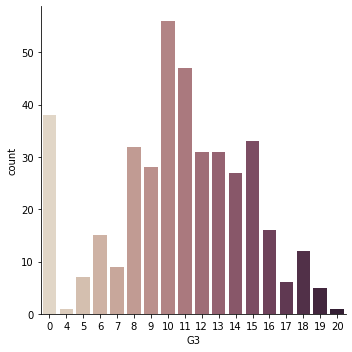

In [34]:
# Grafico de la cantidad de alumnos por nota final.
# Si retiramos a los alumnos que obtuvieron nota 0, una hipotesis sería que estos alumnos no completaron el programa.
# Sin los alumnos con nota final cero, podria ser una distribucion normal ?
p = sns.catplot(x="G3", kind="count", palette="ch:.25", data=df)


In [18]:
# Analisis bivariado entre sexo del alumno y la nota final obtenida.

# Tabla de contingencia entre el Sexo del Alumno y el puntaje final
pd.crosstab(index=df['sex'],columns=df['G3'], margins=True)

# Finalmente el alumno que obtuvo la mejor nota final fue hombre.

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
sex,,,,,,,,,,,,,,,,,,,
F,23,1,3,13,4,14,17,30,29,11,17,14,16,6,3,5,2,0,208
M,15,0,4,2,5,18,11,26,18,20,14,13,17,10,3,7,3,1,187
All,38,1,7,15,9,32,28,56,47,31,31,27,33,16,6,12,5,1,395


In [7]:
# tabla de contingencia en porcentajes relativos total
pd.crosstab(index=df['sex'], columns=df['G3'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,All
sex,,,,,,,,,,,,,,,,,,,
F,5.822785,0.253165,0.759494,3.291139,1.012658,3.544304,4.303797,7.594937,7.341772,2.784810,4.303797,3.544304,4.050633,1.518987,0.759494,1.265823,0.506329,0.000000,52.658228
M,3.797468,0.000000,1.012658,0.506329,1.265823,4.556962,2.784810,6.582278,4.556962,5.063291,3.544304,3.291139,4.303797,2.531646,0.759494,1.772152,0.759494,0.253165,47.341772
All,9.620253,0.253165,1.772152,3.797468,2.278481,8.101266,7.088608,14.177215,11.898734,7.848101,7.848101,6.835443,8.354430,4.050633,1.518987,3.037975,1.265823,0.253165,100.000000


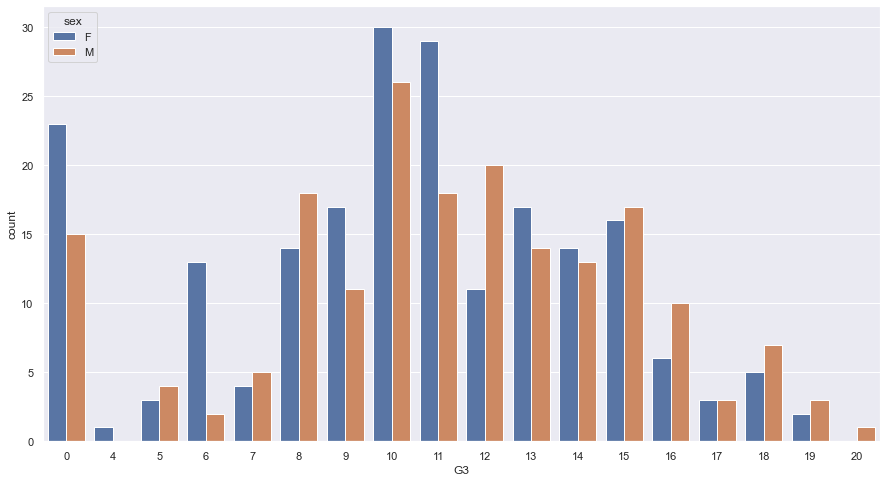

In [38]:
# Cantidad de alumnos segun nota final por sexo
sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(x='G3',hue="sex",data=df)


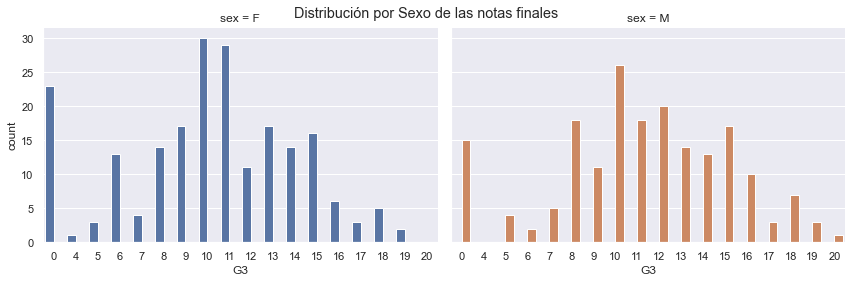

In [52]:
# Grafico separado por sexo

g = sns.catplot(x="G3", hue="sex", col="sex",data=df, kind="count",height=4, aspect=1.5). fig . suptitle (' Distribución por Sexo de las notas finales ')


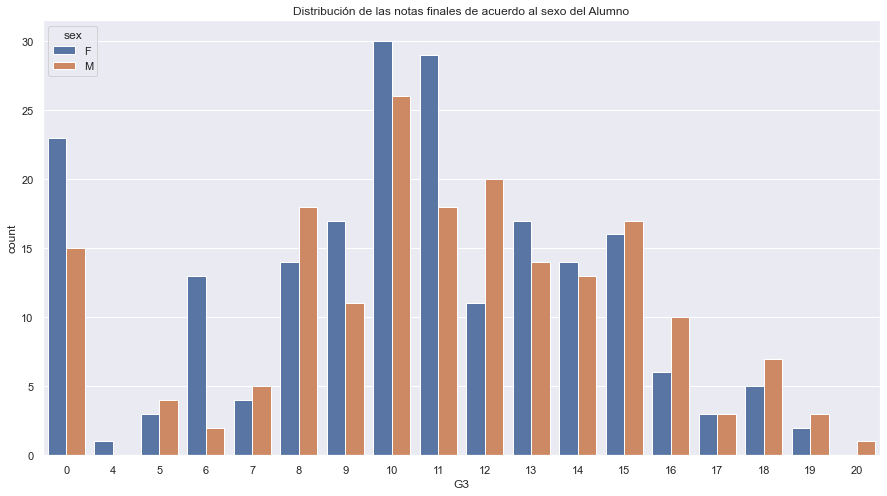

In [53]:
# Notas finales por sexo
sns.set(rc = {'figure.figsize':(15,8)})
w = sns.countplot(x='G3',data=df,hue='sex').set (title = 'Distribución de las notas finales de acuerdo al sexo del Alumno')

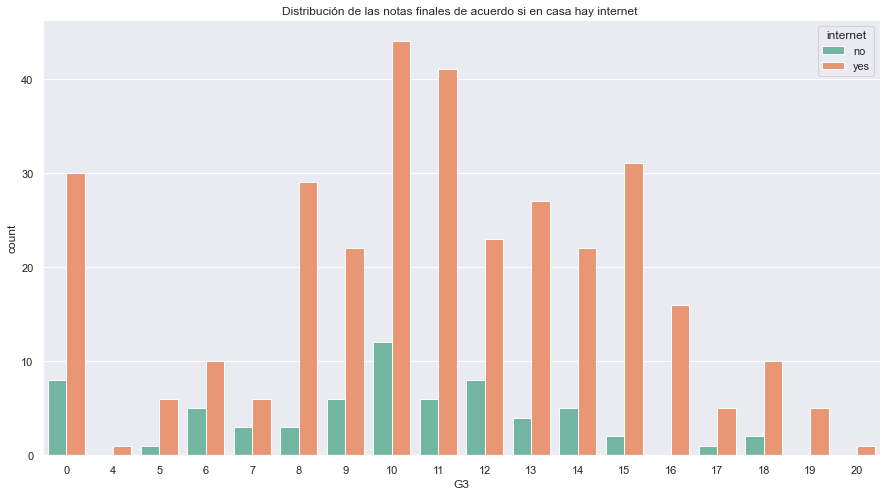

In [49]:
# Analisis bivariado entre la nota final obtenida y si el alumno obtuvo acceso a internet.

# Distribucion de las notas finales de acuerdo si en casa hay internet

sns.set(rc = {'figure.figsize':(15,8)})
p = sns.countplot(x='G3',hue="internet",data=df,palette="Set2"). set (title = 'Distribución de las notas finales de acuerdo si en casa hay internet ')

# al parecer el internet influye en las notas finales

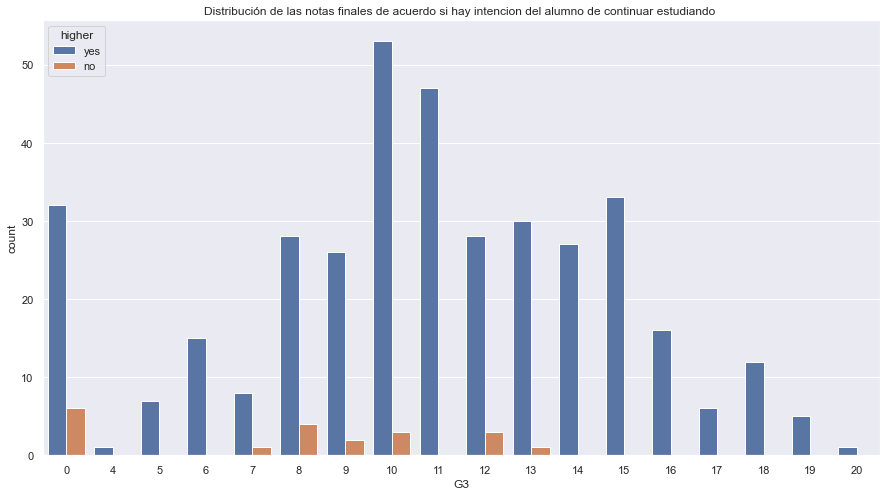

In [55]:
# Analisis Notas Finales y la intencion de continuar con estudios superiores
# Distribucion de las notas finales de acuerdo si la intención del alumno es seguir estudiando
p = sns.countplot(x='G3',hue="higher",
                  data=df).set (title = 'Distribución de las notas finales de acuerdo si hay intencion del alumno de continuar estudiando ')


# La intención de cada alumno de seguir sus estudios en la enseñanza superior es 
# fundamental a la hora de conseguir buenas resultados

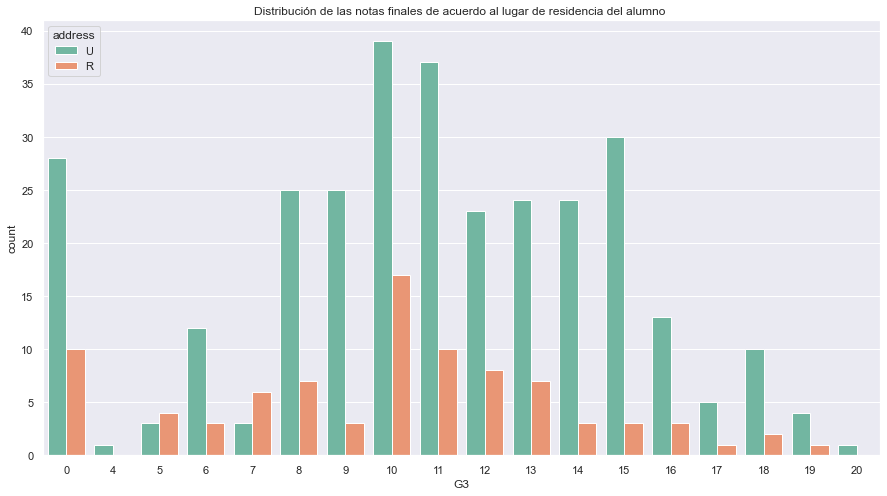

In [56]:
# Analisis Notas Finales y el lugar de residencia del alumno (Rural o Urbano)

p = sns.countplot(x='G3',hue="address",data=df,palette="Set2").set(title = 'Distribución de las notas finales de acuerdo al lugar de residencia del alumno ')

# Los alumnos que viven en zonas urbanas obtienen mejores calificaciones finales


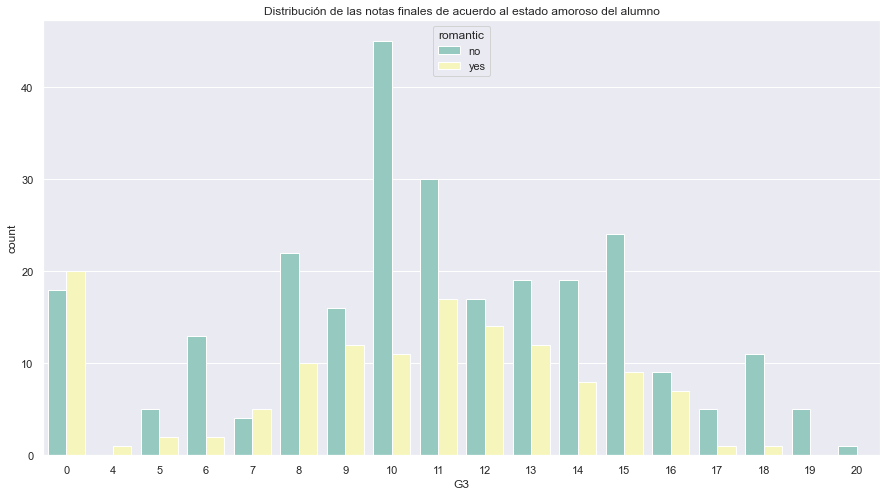

In [60]:
# Analisis Notas Finales y si el alumno esta en una relacion amorosa o no
p = sns.countplot(x='G3',hue="romantic",data=df,palette="Set3").set(title = 'Distribución de las notas finales de acuerdo al estado amoroso del alumno')


# Aquellos que estan en una relacion amorosa obtienen mejores resultados? :)

### Conclusiones preliminares

- La mejor nota obtenida fue de un alumno.
- Los alumnos que tienen internet en casa obtienen mejores calificaciones
- El 33% de los alumnos obtuvieron nota entre 10 y 11
- Los alumnos que declaran seguir estudiando obtienen mejores calificaciones
- Los alumnos que viven en zonas urbanas obtienen mejores notas que aquellos que viven en zonas rurales


Estas pequeñas conclusiones son una pista que se deben profundizar en la etapa de Análisis de datos.